# Context: Predict TMDB Box Office

Our dataset consists of 7398 movies and a variety of metadata provided from The Movie Database (TMDB). Consisting of a number of categorical features (i.e original_languages, spoken_languages) and numerica features (i.e budget, revenue, runtime). Using this we are to predict the worldwide revenue for 4398 movies in the 'test' file

### Loading libraries and the data

In [236]:
import pandas as pd
import pickle
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, median_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.isotonic import IsotonicRegression
from sklearn import ensemble
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.datasets import load_diabetes
from sklearn import impute
from sklearn import preprocessing
from xgboost import XGBRegressor
from sklearn import compose
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

## Exploring the dataset 

An initial overview of the dataset 

- There are many NaN and empty columns
- Some columns are not useful for predicting revenue
- Some columns contain objects or arrays with more content

In [237]:
train.budget.min(), train.budget.max()

(0, 380000000)

In [238]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

#### Taking a close look at the NA values

In [239]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [240]:
train.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

## Data analysis

For are data analysis we are going to start off by looking at some interesting colums which could be important for predicting revenue. We are going to start with the most strait forward one the budget of the film. Films with higher budget, which leads to higher production, more well know cast and greater popularity from example marketing often leads to greater succes. What's going to be interesting here is to see if how ofter this is the case or other films with less budget can reach same hights.

C:\Users\matia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


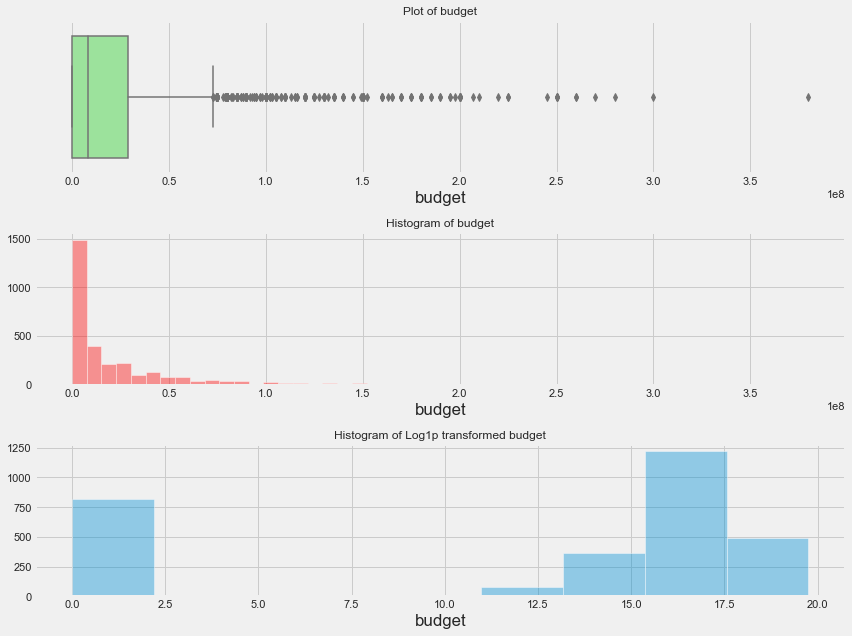

In [242]:
f, ax = plt.subplots(3, figsize=(12,9))

sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=train.budget, ax = ax[0], color='lightgreen')
ax[0].set_title("Plot of budget")
sns.distplot(a=train.budget, kde = False, ax = ax[1], color='red')
ax[1].set_title("Histogram of budget")
sns.distplot(a=np.log1p(train.budget), kde = False, ax = ax[2])
ax[2].set_title("Histogram of Log1p transformed budget")
f.tight_layout()

We can see that budget distribution is heavily skewed to the right due to the large cost of higher end film budgets. Also alot of films are missing a budget or have a very low budget something which very likeley due to missing budget information. Due to this error effecting over 850 movies we are later on going to set a minimum cap on our budget for our machine learning part. Next we are looking at original languages in the different films.

In [243]:
train.original_language.value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
nl       6
pt       6
fa       5
da       5
ro       4
hu       3
tr       3
no       2
ml       2
pl       2
te       2
fi       2
ur       1
he       1
el       1
ar       1
nb       1
vi       1
mr       1
cs       1
sr       1
bn       1
id       1
Name: original_language, dtype: int64

We can see a large amount of different langauges where the majority is english speak. Let's try this again with only counting english speaking vs non english speaking.

In [244]:
train['original_language_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['original_language_english'].value_counts()

1    2575
0     425
Name: original_language_english, dtype: int64

Again english films dominate with allmost 6 times the amount of film compared to non english speaking.

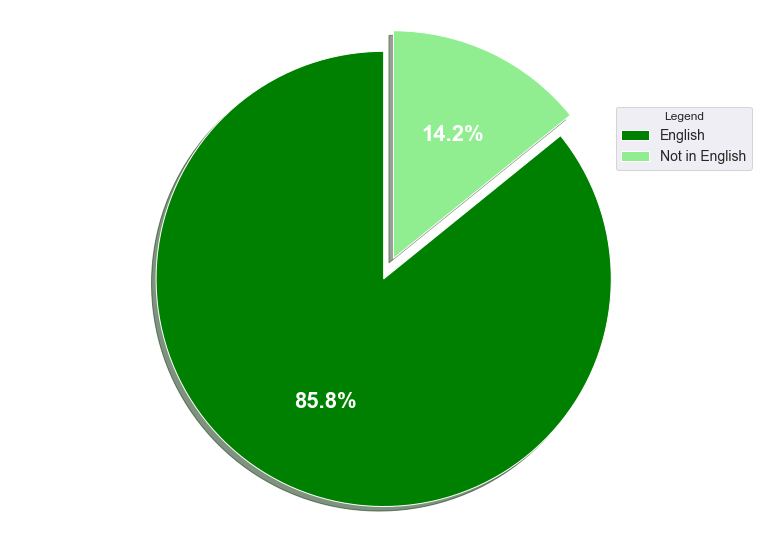

In [245]:
# Plotting original_language
labels = 'English', 'Not in English'
btc_1 = [(train.original_language_english == 1).sum(axis=0), (train.original_language_english == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['green', 'lightgreen']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

Last we are going to analyze the renvenue

C:\Users\matia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


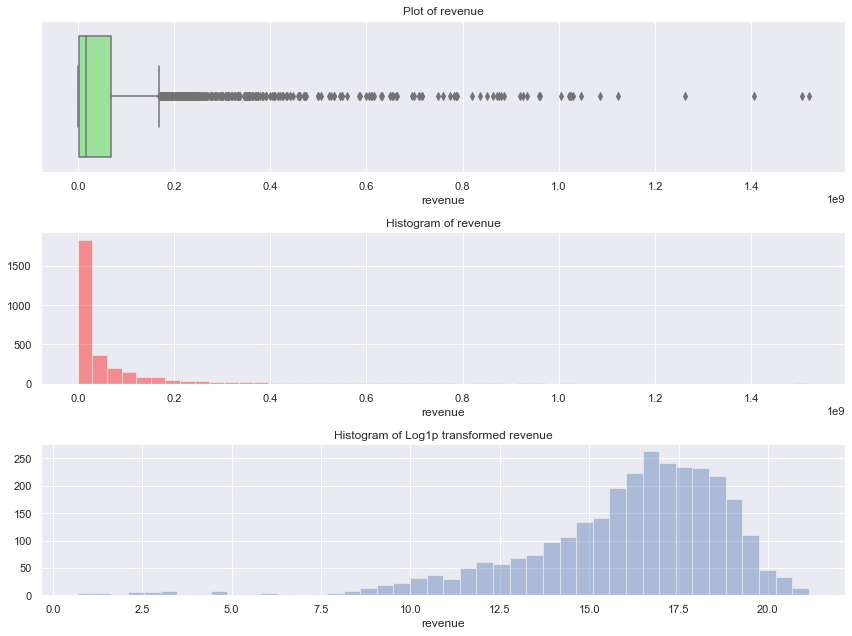

In [246]:
f, ax = plt.subplots(3, figsize=(12,9))

sns.set(rc={'figure.figsize':(12,9)})
sns.boxplot(x=train.revenue, ax = ax[0], color='lightgreen')
ax[0].set_title("Plot of revenue")
sns.distplot(a=train.revenue, kde = False, ax = ax[1], color='red')
ax[1].set_title("Histogram of revenue")
sns.distplot(a=np.log1p(train.revenue), kde = False, ax = ax[2])
ax[2].set_title("Histogram of Log1p transformed revenue")
f.tight_layout()

train["log_revenue"] = np.log1p(train.revenue)

Looking at the renvenue we can see it moving heavily to the right, which likley due to major box office hits effecting the distribution drastically.  

## Preprocessing

In [247]:
train = train.loc[train['revenue']>15_000]

X = train[['budget', 'genres', 'original_language', 'popularity', 'production_companies', 'release_date', 'runtime']]
y = train['revenue']

In [248]:
def get_age(df, col_name):
    df['current_day'] = pd.to_datetime('today')
    df[col_name+'-age']  = (df['current_day'] - pd.to_datetime(df[col_name])).dt.days
    df.drop(['current_day'],axis=1, inplace=True)
    
def get_genre_list (genres):
    res = []
    if not genres or pd.isnull(genres):
        return res
    genres = genres.replace('[','').replace(']','')
    genre_list = genres.split('},')
    for item in genre_list:
        res.append(int(item.split(',')[0].replace("{'id': ", '')))
    return res

In [249]:
def get_counts(df,col_name):
    x = []
    for j in df[col_name]:
        x.append(j)
    return Counter(sum(x,[]))

def get_unique(df,col_name):
    x = set()
    for j in df[col_name]:
        x = x.union(j)
    return list(x)

def n_hot_encode(df,col_name, val_list=None):
    if(not val_list):
        val_list = get_unique(df, col_name) 
    for i in range(len(val_list)):
        df[col_name+str(i)] = 0
    for index, row in df.iterrows():
        for elm in df[col_name][index]:
            if( elm in val_list):
                df[col_name+str(val_list.index(elm))][index] = 1

In [250]:
def get_prod_id_list(prod):
    res = []
    if not prod or pd.isnull(prod):
        return res
    prod = prod.replace('[{','').replace('}]','')
    prod_list = prod.split('},')
    for item in prod_list:
        res.append(int(item.split(',')[-1].replace("'id': ", '')))
    return res

def get_prod_list_names(prod):
    res = []
    if not prod or pd.isnull(prod):
        return res
    prod = prod.replace('[{','').replace('}]','')
    prod_list = prod.split('},')
    for item in prod_list:
        res.append(int(item.split(',')[-1].replace("'name': ", '')))
    return res


In [251]:
def get_list_of_casts(df, col):
    cast_list = []
    for index, row in df.iterrows():
        cast_dict_list = eval(df[col][index])
        for idx in range(len(cast_dict_list)):
            cast_list.append(cast_dict_list[idx]['name'])
    return cast_list

def create_popular_cast_counter(df, col, casts, n):
    most_popular = Counter(casts).most_common(n)
    df['cast'] = 0
    for index, row in df.iterrows():
        cast_dict_str = df[col][index]
        for cast in most_popular:
            if cast[0] in cast_dict_str:
                df['cast'][index] = df['cast'][index] + 1


In [252]:
def create_language_order_dict(df, col_name):
    language_order = df.groupby([col_name]).mean().reset_index()[[col_name, 'revenue']].sort_values(by='revenue', ascending=False)
    language_order_dict = {}
    languages = list(language_order[col_name])
    for i in range(len(languages)):
        language_order_dict[languages[i]] = i
    return language_order_dict

def get_language_position(language):
    language_order_dict = create_language_order_dict(train, 'original_language')
    return language_order_dict[language]

In [253]:
def create_dump_month_identifier(df, col):
    df[col] = pd.to_datetime(df[col])
    df[col+'_month'] = df[col].dt.month
    df['dump_month_identifier'] = 0
    for index, row in df.iterrows():
        if df[col+'_month'][index] in [1,2,8,9]:
            df['dump_month_identifier'][index] = 1   
    df.drop([col+'_month'],axis=1,inplace=True)

In [254]:
X['genre_list'] = X['genres'].apply(get_genre_list)
n_hot_encode(X,'genre_list')
X.drop(['genre_list','genres'], axis=1, inplace=True)

get_age(X, 'release_date')
X.drop(['release_date'],axis=1,inplace=True)

X['prod_comp_list'] = X['production_companies'].apply(get_prod_id_list)
val_list = [x[0] for x in get_counts(X,'prod_comp_list').most_common(20)]
n_hot_encode(X,'prod_comp_list', val_list)
X.drop(['production_companies', 'prod_comp_list'],axis=1,inplace=True)

X['original_language'] = X['original_language'].apply(get_language_position)

<ipython-input-254-bcb71b15ad47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['genre_list'] = X['genres'].apply(get_genre_list)
<ipython-input-249-1560a6725aed>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name+str(i)] = 0
<ipython-input-249-1560a6725aed>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [255]:
def rmlse(target_true, target_predicted):
    assert len(target_true) == len(target_predicted)
    log_diff = np.log(target_predicted + 1) - np.log(target_true + 1)
    return np.sqrt(np.mean(np.power(log_diff, 2)))

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

In [257]:
def make_pipelines(df_cols):
    numeric_features = list(df_cols)
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median', missing_values=np.nan))])
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])
    pipelines = [Pipeline(steps=[('preprocessor', preprocessor),('scaler', preprocessing.StandardScaler()),('reg', Ridge(normalize = True))])]
    pipelines.append(Pipeline(steps=[('preprocessor', preprocessor),('scaler', preprocessing.StandardScaler()),('reg', KNeighborsRegressor())]))
    pipelines.append(Pipeline(steps=[('preprocessor', preprocessor),('scaler', preprocessing.StandardScaler()),('reg', BayesianRidge())]))
    pipelines.append(Pipeline(steps=[('preprocessor', preprocessor),('reg', RandomForestRegressor(random_state = 42))]))
    pipelines.append(Pipeline(steps=[('preprocessor', preprocessor),('xgb', XGBRegressor(seed = 42))]))
    return pipelines

In [258]:
def make_pipeline_model_eval(df_cols, regressor = None):
    numeric_transformer = Pipeline(steps=[('imputer', impute.SimpleImputer(strategy='median', missing_values=np.nan)), \
                                          ('scaler', preprocessing.StandardScaler())])
    preprocessor = compose.ColumnTransformer(transformers=[('num', numeric_transformer, list(df_cols))])
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('regressor', regressor)])
    return pipeline

In [259]:
pipelines = make_pipelines(X_train.columns)

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
for pipe in pipelines:
    name = pipe.steps[-1][1].__class__.__name__.split('.')[-1]
    y_pred = pipe.predict(X_val)
    r2score = round(r2_score(y_val, y_pred), 2)
    rmlse_score = round(rmlse(y_val, y_pred), 2)
    medae_value = round(median_absolute_error(y_val,y_pred), 2)
    print(f"\nFor {name:<22}\n r2_score:{r2score}, rmlse:{rmlse_score}, medae:{medae_value}")


For Ridge                 
 r2_score:0.5, rmlse:2.07, medae:27901376.81

For KNeighborsRegressor   
 r2_score:0.49, rmlse:2.03, medae:28757158.0

For BayesianRidge         
 r2_score:-0.01, rmlse:2.71, medae:57940281.03

For RandomForestRegressor 
 r2_score:0.69, rmlse:1.67, medae:18439132.34

For XGBRegressor          
 r2_score:0.72, rmlse:1.86, medae:21882630.0


<ipython-input-255-d094176a300c>:3: RuntimeWarning: invalid value encountered in log
  log_diff = np.log(target_predicted + 1) - np.log(target_true + 1)
<ipython-input-255-d094176a300c>:3: RuntimeWarning: invalid value encountered in log
  log_diff = np.log(target_predicted + 1) - np.log(target_true + 1)


## Machine learning

In [260]:
cv=8
n_iter=20

#### RandomizedSearchCV

In [261]:
def RandomForest_Seach_CV():
    rdfr = RandomForestRegressor(random_state = 42)
    
    # Number of trees in random forest
    n_estimators = [20,40,45,50,60,80,100,150,200, 300, 500, 600, 700, 800]
    
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt', 20, 25, 30, 35]
    
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10, 15]
    
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4, 8, 10]
    

    hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
    
    clf_random_cv = RandomizedSearchCV(rdfr, 
                              hyperparameters, 
                              cv=cv, 
                              n_iter=n_iter)
    print(clf_random_cv)
    return clf_random_cv

In [262]:
cv = RandomForest_Seach_CV()
final_model = make_pipeline_model_eval(X_train.columns, cv)
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_val)
r2score = round(r2_score(y_val, y_pred),2)
rmlse_score = round(rmlse(y_val, y_pred), 2)
medae_value = round(median_absolute_error(y_val, y_pred), 2)

RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 20, 25,
                                                         30, 35],
                                        'min_samples_leaf': [1, 2, 4, 8, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [20, 40, 45, 50, 60, 80,
                                                         100, 150, 200, 300,
                                                         500, 600, 700, 800]})


#### 5-fold cross validation

In [263]:
accuracies = []
medae = []
def k_fold_validation():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        final_model.fit(X_train, y_train)
        y_pred = final_model.predict(X_test)
        medae_value = median_absolute_error(y_test, y_pred)
        medae.append(medae_value)
        accuracies.append(rmlse(y_test, y_pred))
k_fold_validation()

In [264]:
y_pred = final_model.predict(X_test)
r2score = round(r2_score(y_test, y_pred),2)
rmlse_score = round(rmlse(y_test, y_pred), 2)
medae_value = round(median_absolute_error(y_test, y_pred), 2)
print(f"Model performance on test data , r2_score:{r2score}, rmlse:{rmlse_score}, medae:{medae_value}")

Model performance on test data , r2_score:0.88, rmlse:1.43, medae:9991416.54


In [265]:
pickle.dump(final_model, open('final_model_boxoffice', 'wb'))